In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("C:\\Users\\INDIA\\Downloads\\Assignment csv file\\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
len(df['Taxable.Income'].unique())

599

In [10]:
df['Taxable.Income'].values

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [11]:
lrk =[68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501, 97984, 53378, 93458, 56501, 46955, 33492, 35832,
       12470, 53981, 22773, 84691, 50087, 27877, 56647, 59419, 26783,
       79453, 33962, 84429, 63057, 43128, 40220, 79700, 67083, 22054,
       18192, 25222, 58635, 39114, 48738, 28496, 62209, 87677, 93659,
       56503, 27081, 48779, 91304, 49520, 41117, 18199, 76992, 98588,
       20719, 13068, 84835, 44795, 39052, 38704, 98416, 86958, 29222,
       71357, 29543, 23855, 84836, 93307, 64614, 72949, 79211, 28707,
       83229, 73620, 70819, 48313, 37481, 20851, 86079, 10933, 66905,
       36890, 19060, 61906, 31088, 70365, 56536, 16992, 14300, 51914,
       12083, 71376, 99307, 35200, 70812, 62067, 62365, 80618, 52891,
       31409, 81790, 57794, 20604, 83459, 43051, 68911, 38374, 86784,
       42488, 35922, 46610, 28764, 75170, 24370, 84083, 11784, 10003,
       98970, 77735, 46070, 27143, 56974, 99109, 32603, 24215, 33092,
       71297, 68268, 33810, 49995, 11865, 28904, 39144, 31591, 30167,
       72382, 79869, 70526, 38143, 70298, 54747, 92997, 24347, 57445,
       70645, 69540, 70712, 32900, 14326, 43865, 29046, 95088, 38586,
       30468, 42254, 32467, 68404, 58451, 86208, 62426, 63710, 25062,
       56438, 17783, 92426, 64667, 32483, 15673, 77511, 76182, 89831,
       12072, 81231, 48169, 31699, 15710, 31645, 98933, 52912, 68756,
       41087, 46798, 34475, 98334, 10900, 61445, 78796, 62141, 90945,
       88918, 62873, 70949, 31521, 59615, 52111, 34598, 61124, 59689,
       23075, 48192, 77367, 82625, 51802, 78922, 38670, 48392, 47425,
       73906, 94013, 27698, 26793, 67033, 20109, 95185, 27684, 98240,
       18032, 46470, 33301, 62800, 27520, 26094, 13571, 36239, 77082,
       71572, 30495, 49771, 32905, 21337, 16082, 43883, 15491, 48081,
       36317, 15627, 51028, 14422, 45525, 23480, 19184, 80239, 33215,
       65203, 65190, 16320, 21696, 56129, 74971, 33356, 29607, 95319,
       94413, 78963, 66865, 40427, 93733, 63543, 41184, 96652, 56555,
       36457, 26101, 36156, 49958, 68696, 97453, 68533, 96438, 50348,
       85016, 73188, 64225, 64437, 66330, 26372, 30714, 84263, 86531,
       93090, 79373, 17440, 81536, 62494, 37580, 60822, 96032, 91545,
       73313, 54345, 33138, 33579, 83094, 90065, 51913, 81378, 32236,
       97980, 38626, 64230, 38183, 89277, 68269, 58751, 88720, 99311,
       94528, 72268, 79593, 94247, 76700, 12011, 87935, 98720, 38638,
       37857, 15532, 22159, 91547, 98738, 21966, 14398, 18572, 77312,
       42074, 82799, 12659, 19649, 50119, 18888, 83061, 39343, 92007,
       78728, 48640, 92070, 97341, 97493, 78400, 52862, 11804, 10455,
       25766, 58199, 88613, 16690, 71164, 48825, 29236, 59689, 48940,
       64320, 84845, 52663, 17957, 69018, 58496, 99128, 35868, 79478,
       57402, 73795, 58403, 85972, 62998, 32786, 17962, 59440, 94772,
       80083, 81026, 86883, 39444, 35886, 24541, 54502, 17183, 39562,
       70157, 72151, 65170, 67936, 93339, 57365, 56628, 83814, 75324,
       46939, 71428, 23884, 95145, 46002, 20309, 72115, 42769, 91870,
       55308, 60789, 51363, 99239, 19272, 44411, 60915, 98433, 81867,
       43980, 50286, 29385, 47565, 26494, 59243, 91488, 33116, 93364,
       70743, 34007, 26128, 33748, 38896, 40674, 97111, 54850, 32948,
       12682, 12453, 34655, 59351, 29916, 36532, 94583, 92819, 76535,
       91220, 71238, 32356, 89094, 91462, 75585, 31629, 42063, 12810,
       85570, 72026, 90444, 50403, 78867, 95920, 41545, 63912, 92498,
       16316, 68617, 59860, 55981, 34833, 39818, 59227, 44809, 10735,
       50242, 56166, 42483, 70572, 31721, 31085, 84931, 69036, 42679,
       84557, 54126, 87685, 85076, 31633, 43018, 27394, 68152, 84775,
       47364, 76340, 69967, 47334, 98592, 96519]

In [12]:
rk =pd.Series([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501, 97984, 53378, 93458, 56501, 46955, 33492, 35832,
       12470, 53981, 22773, 84691, 50087, 27877, 56647, 59419, 26783,
       79453, 33962, 84429, 63057, 43128, 40220, 79700, 67083, 22054,
       18192, 25222, 58635, 39114, 48738, 28496, 62209, 87677, 93659,
       56503, 27081, 48779, 91304, 49520, 41117, 18199, 76992, 98588,
       20719, 13068, 84835, 44795, 39052, 38704, 98416, 86958, 29222,
       71357, 29543, 23855, 84836, 93307, 64614, 72949, 79211, 28707,
       83229, 73620, 70819, 48313, 37481, 20851, 86079, 10933, 66905,
       36890, 19060, 61906, 31088, 70365, 56536, 16992, 14300, 51914,
       12083, 71376, 99307, 35200, 70812, 62067, 62365, 80618, 52891,
       31409, 81790, 57794, 20604, 83459, 43051, 68911, 38374, 86784,
       42488, 35922, 46610, 28764, 75170, 24370, 84083, 11784, 10003,
       98970, 77735, 46070, 27143, 56974, 99109, 32603, 24215, 33092,
       71297, 68268, 33810, 49995, 11865, 28904, 39144, 31591, 30167,
       72382, 79869, 70526, 38143, 70298, 54747, 92997, 24347, 57445,
       70645, 69540, 70712, 32900, 14326, 43865, 29046, 95088, 38586,
       30468, 42254, 32467, 68404, 58451, 86208, 62426, 63710, 25062,
       56438, 17783, 92426, 64667, 32483, 15673, 77511, 76182, 89831,
       12072, 81231, 48169, 31699, 15710, 31645, 98933, 52912, 68756,
       41087, 46798, 34475, 98334, 10900, 61445, 78796, 62141, 90945,
       88918, 62873, 70949, 31521, 59615, 52111, 34598, 61124, 59689,
       23075, 48192, 77367, 82625, 51802, 78922, 38670, 48392, 47425,
       73906, 94013, 27698, 26793, 67033, 20109, 95185, 27684, 98240,
       18032, 46470, 33301, 62800, 27520, 26094, 13571, 36239, 77082,
       71572, 30495, 49771, 32905, 21337, 16082, 43883, 15491, 48081,
       36317, 15627, 51028, 14422, 45525, 23480, 19184, 80239, 33215,
       65203, 65190, 16320, 21696, 56129, 74971, 33356, 29607, 95319,
       94413, 78963, 66865, 40427, 93733, 63543, 41184, 96652, 56555,
       36457, 26101, 36156, 49958, 68696, 97453, 68533, 96438, 50348,
       85016, 73188, 64225, 64437, 66330, 26372, 30714, 84263, 86531,
       93090, 79373, 17440, 81536, 62494, 37580, 60822, 96032, 91545,
       73313, 54345, 33138, 33579, 83094, 90065, 51913, 81378, 32236,
       97980, 38626, 64230, 38183, 89277, 68269, 58751, 88720, 99311,
       94528, 72268, 79593, 94247, 76700, 12011, 87935, 98720, 38638,
       37857, 15532, 22159, 91547, 98738, 21966, 14398, 18572, 77312,
       42074, 82799, 12659, 19649, 50119, 18888, 83061, 39343, 92007,
       78728, 48640, 92070, 97341, 97493, 78400, 52862, 11804, 10455,
       25766, 58199, 88613, 16690, 71164, 48825, 29236, 59689, 48940,
       64320, 84845, 52663, 17957, 69018, 58496, 99128, 35868, 79478,
       57402, 73795, 58403, 85972, 62998, 32786, 17962, 59440, 94772,
       80083, 81026, 86883, 39444, 35886, 24541, 54502, 17183, 39562,
       70157, 72151, 65170, 67936, 93339, 57365, 56628, 83814, 75324,
       46939, 71428, 23884, 95145, 46002, 20309, 72115, 42769, 91870,
       55308, 60789, 51363, 99239, 19272, 44411, 60915, 98433, 81867,
       43980, 50286, 29385, 47565, 26494, 59243, 91488, 33116, 93364,
       70743, 34007, 26128, 33748, 38896, 40674, 97111, 54850, 32948,
       12682, 12453, 34655, 59351, 29916, 36532, 94583, 92819, 76535,
       91220, 71238, 32356, 89094, 91462, 75585, 31629, 42063, 12810,
       85570, 72026, 90444, 50403, 78867, 95920, 41545, 63912, 92498,
       16316, 68617, 59860, 55981, 34833, 39818, 59227, 44809, 10735,
       50242, 56166, 42483, 70572, 31721, 31085, 84931, 69036, 42679,
       84557, 54126, 87685, 85076, 31633, 43018, 27394, 68152, 84775,
       47364, 76340, 69967, 47334, 98592, 96519])

rk[rk <= 30000] =0# here 30 means Risky high risk to make a Fraud
rk[rk > 30000] =1# here 40 means Safe or Normal Not a Fraud

In [13]:
df['Taxable.Income1']=rk

In [14]:
df = df.drop(columns = ['Taxable.Income'])

In [15]:
len(df['Taxable.Income1'].values)

600

In [16]:
#df['Taxable.Income1'] = pd.get_dummies(df['Taxable.Income1'])

In [17]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,1
596,YES,Divorced,55369,2,YES,1
597,NO,Divorced,154058,0,YES,1
598,YES,Married,180083,17,NO,1


In [18]:
df['Taxable.Income1'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df['Marital.Status']=encoder.fit_transform(df['Marital.Status'])
df['Urban']=encoder.fit_transform(df['Urban'])

In [22]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [23]:
df.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Taxable.Income1'],
      dtype='object')

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report

In [25]:
df1 =df[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]

In [26]:
X =df1
y=df['Taxable.Income1']

In [27]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state= 10)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((420, 5), (180, 5), (420,), (180,))

In [29]:
model =DecisionTreeClassifier( criterion='entropy',max_depth =3)
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

[Text(0.375, 0.875, 'X[2] <= 26849.0\nentropy = 0.712\nsamples = 420\nvalue = [82, 338]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.625, 'X[2] <= 60294.5\nentropy = 0.708\nsamples = 419\nvalue = [81, 338]'),
 Text(0.25, 0.375, 'X[3] <= 27.5\nentropy = 0.56\nsamples = 84\nvalue = [11, 73]'),
 Text(0.125, 0.125, 'entropy = 0.627\nsamples = 70\nvalue = [11, 59]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.375, 'X[2] <= 64532.5\nentropy = 0.739\nsamples = 335\nvalue = [70, 265]'),
 Text(0.625, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.875, 0.125, 'entropy = 0.724\nsamples = 328\nvalue = [66, 262]')]

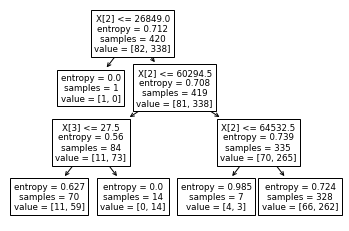

In [30]:
tree.plot_tree(model)

[Text(0.375, 0.875, 'City.Population <= 26849.0\nentropy = 0.712\nsamples = 420\nvalue = [82, 338]\nclass = 1(Good)'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0(Risky)'),
 Text(0.5, 0.625, 'City.Population <= 60294.5\nentropy = 0.708\nsamples = 419\nvalue = [81, 338]\nclass = 1(Good)'),
 Text(0.25, 0.375, 'Work.Experience <= 27.5\nentropy = 0.56\nsamples = 84\nvalue = [11, 73]\nclass = 1(Good)'),
 Text(0.125, 0.125, 'entropy = 0.627\nsamples = 70\nvalue = [11, 59]\nclass = 1(Good)'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = 1(Good)'),
 Text(0.75, 0.375, 'City.Population <= 64532.5\nentropy = 0.739\nsamples = 335\nvalue = [70, 265]\nclass = 1(Good)'),
 Text(0.625, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = 0(Risky)'),
 Text(0.875, 0.125, 'entropy = 0.724\nsamples = 328\nvalue = [66, 262]\nclass = 1(Good)')]

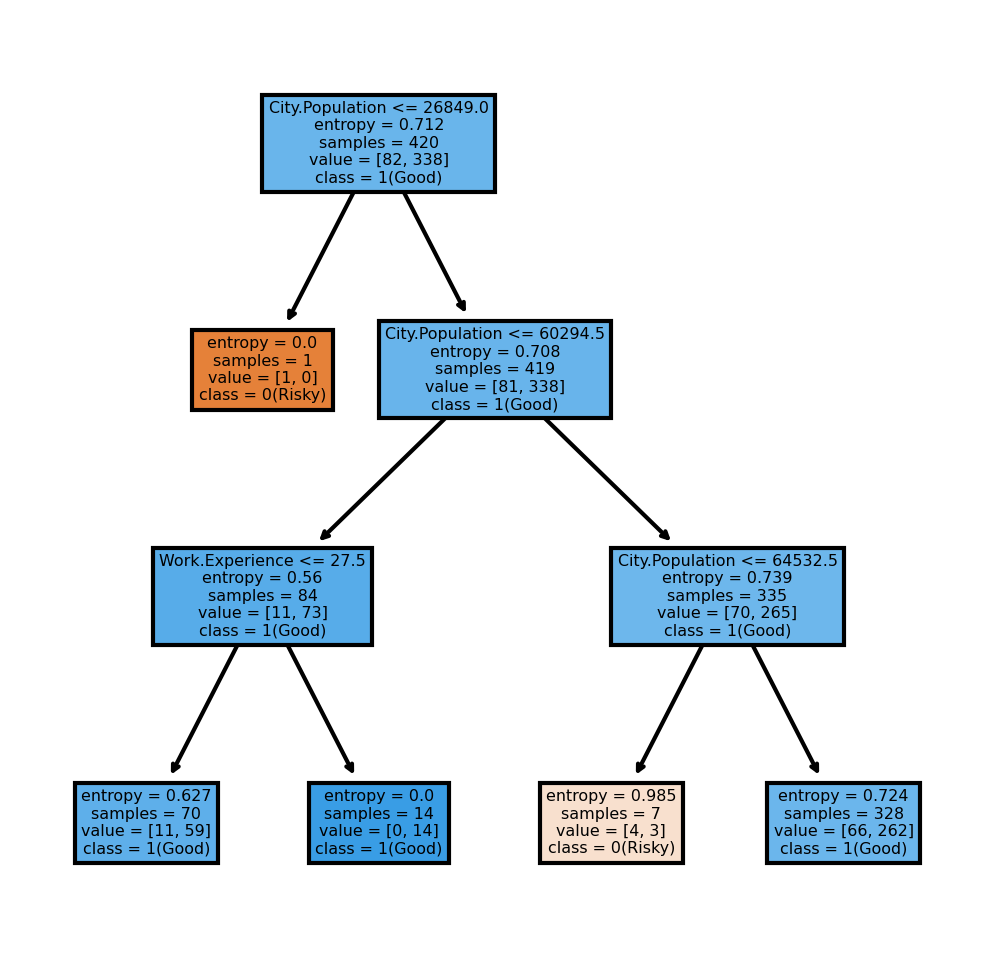

In [31]:
fn =['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=["0(Risky)", "1(Good)"]
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled= True)

In [32]:
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)

0.75


In [33]:
pd.crosstab(y_pred,y_test)

Taxable.Income1,0,1
row_0,,
0,1,4
1,41,134


In [34]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

45

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.02      0.04        42
           1       0.77      0.97      0.86       138

    accuracy                           0.75       180
   macro avg       0.48      0.50      0.45       180
weighted avg       0.63      0.75      0.67       180



Criterion According to gini

In [36]:
model1 =DecisionTreeClassifier(criterion='gini',max_depth =3)
model1.fit(X_train,y_train)
y_pred1= model1.predict(X_test)

In [37]:
accuracy =accuracy_score(y_pred1,y_test)
accuracy

0.75

In [38]:
pd.crosstab(y_pred1,y_test)

Taxable.Income1,0,1
row_0,,
0,1,4
1,41,134


In [39]:
count_misclassified =(y_test != y_pred1).sum()
count_misclassified

45

In [40]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.20      0.02      0.04        42
           1       0.77      0.97      0.86       138

    accuracy                           0.75       180
   macro avg       0.48      0.50      0.45       180
weighted avg       0.63      0.75      0.67       180



--------------------------------------------------------------------------------------------END--------------------------